# Queueing theory - D/D/1 example

### 1. Imports

In [2]:
import openqtsim

import pandas as pd
import xlrd

### 2. Prepare inputs

#### Read IAT and ST table from Excel

In [3]:
df = pd.read_excel('Queueing theory - D D 1 example.xlsx', index_col=None, header=0, sheet_name='data')
df.head(5)

,name,IAT,ST,AT,maxwait,unloading,loading,length
0,Yellowstar,48,72,48,24,48,24,80
1,United,0,120,48,48,24,96,80
2,Oil Trade,72,48,120,24,48,0,100
3,Yellowstar,96,72,216,24,48,24,80
4,Fruit Trade,0,144,216,0,72,72,90


#### Define the queue object input

In [6]:
A = openqtsim.ArrivalProcess("D", df[["name","IAT","AT"]])
S = openqtsim.ServiceProcess("D", df[["name","ST"]])
c = 1

#### Create the queue object and use it to create a simulating object

In [7]:
# todo: enable deterministic analyses by adding a list of 'customer_name#', 'interarrival#' and 'servicetime#'
q = openqtsim.Queue(A, S, c)
q.kendall_notation

'D/D/1/inf/inf/FIFO'

### 3. Run the simulation

In [8]:
%%time
print('Start simulation of "{}" queue'.format(q.kendall_notation))
print('')

sim = openqtsim.Simulation(q)
sim.run() # nr is the number of customers that will arrive at the server

Start simulation of "D/D/1/inf/inf/FIFO" queue

Nr of customers: 30

Wall time: 125 ms


In [9]:
sim.get_stats()

Waiting time over service time: 6.5736

Rho: system utilisation: 0.9847

P_0: probability nobody in the system: 0.0153
W_s: the long term average time spent in the system: 781.6000
W_q: the long term average time spent in the queue: 678.4000
IAT: average inter arrival time: 69.5172
ST: average service time: 103.2000



In [10]:
sim.return_log()

,c_id,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS,QL
0,United,48,120,48.0,48.0,168.0,120.0,0.0,48,2
1,Oil Trade,0,48,48.0,168.0,216.0,168.0,120.0,0,2
2,Yellowstar,72,72,120.0,216.0,288.0,168.0,96.0,0,3
3,Fruit Trade,96,144,216.0,288.0,432.0,216.0,72.0,0,3
4,ABC,0,168,216.0,432.0,600.0,384.0,216.0,0,7
5,Yellowstar,72,72,288.0,600.0,672.0,384.0,312.0,0,6
6,United,96,120,384.0,672.0,792.0,408.0,288.0,0,7
7,Fruit Trade,48,144,432.0,792.0,936.0,504.0,360.0,0,8
8,Yellowstar,24,72,456.0,936.0,1008.0,552.0,480.0,0,9
9,Oil Trade,96,48,552.0,1008.0,1056.0,504.0,456.0,0,10


#### Plot IAT and ST

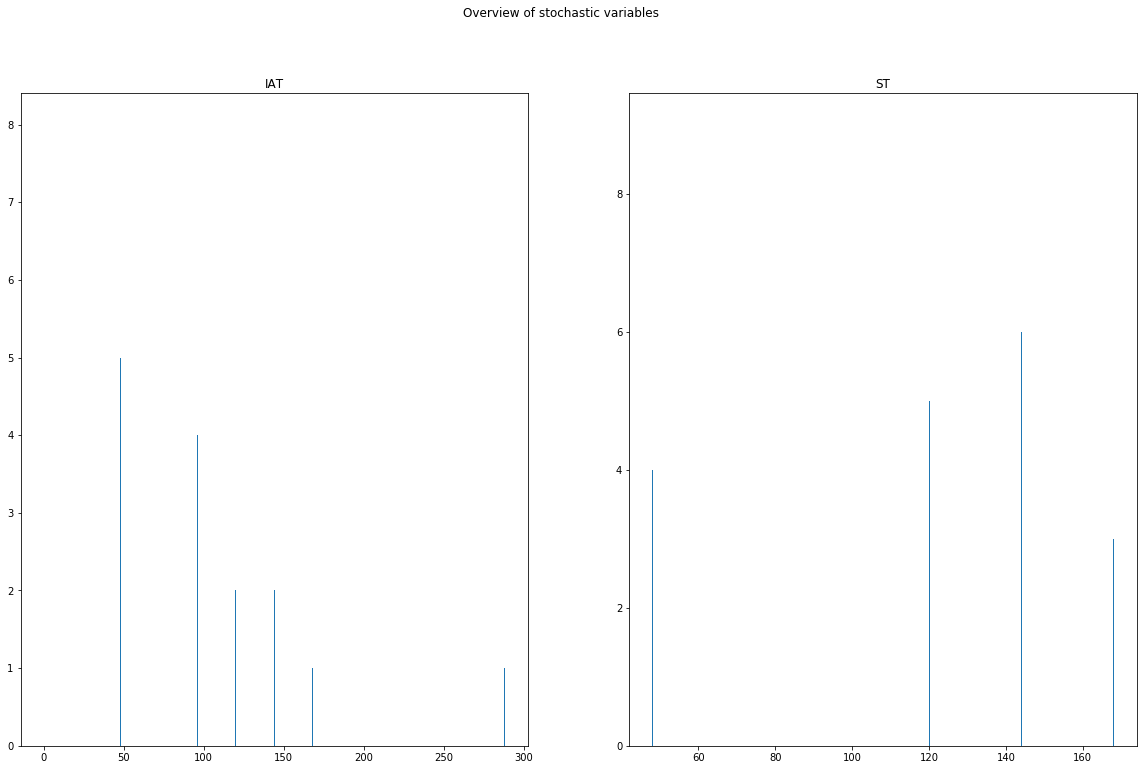

In [12]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

fig.suptitle('Overview of stochastic variables')
ax1.hist(sim.log["IAT"],1000); ax1.set_title('IAT');
ax2.hist(sim.log["ST"],1000); ax2.set_title('ST');

## Sandbox